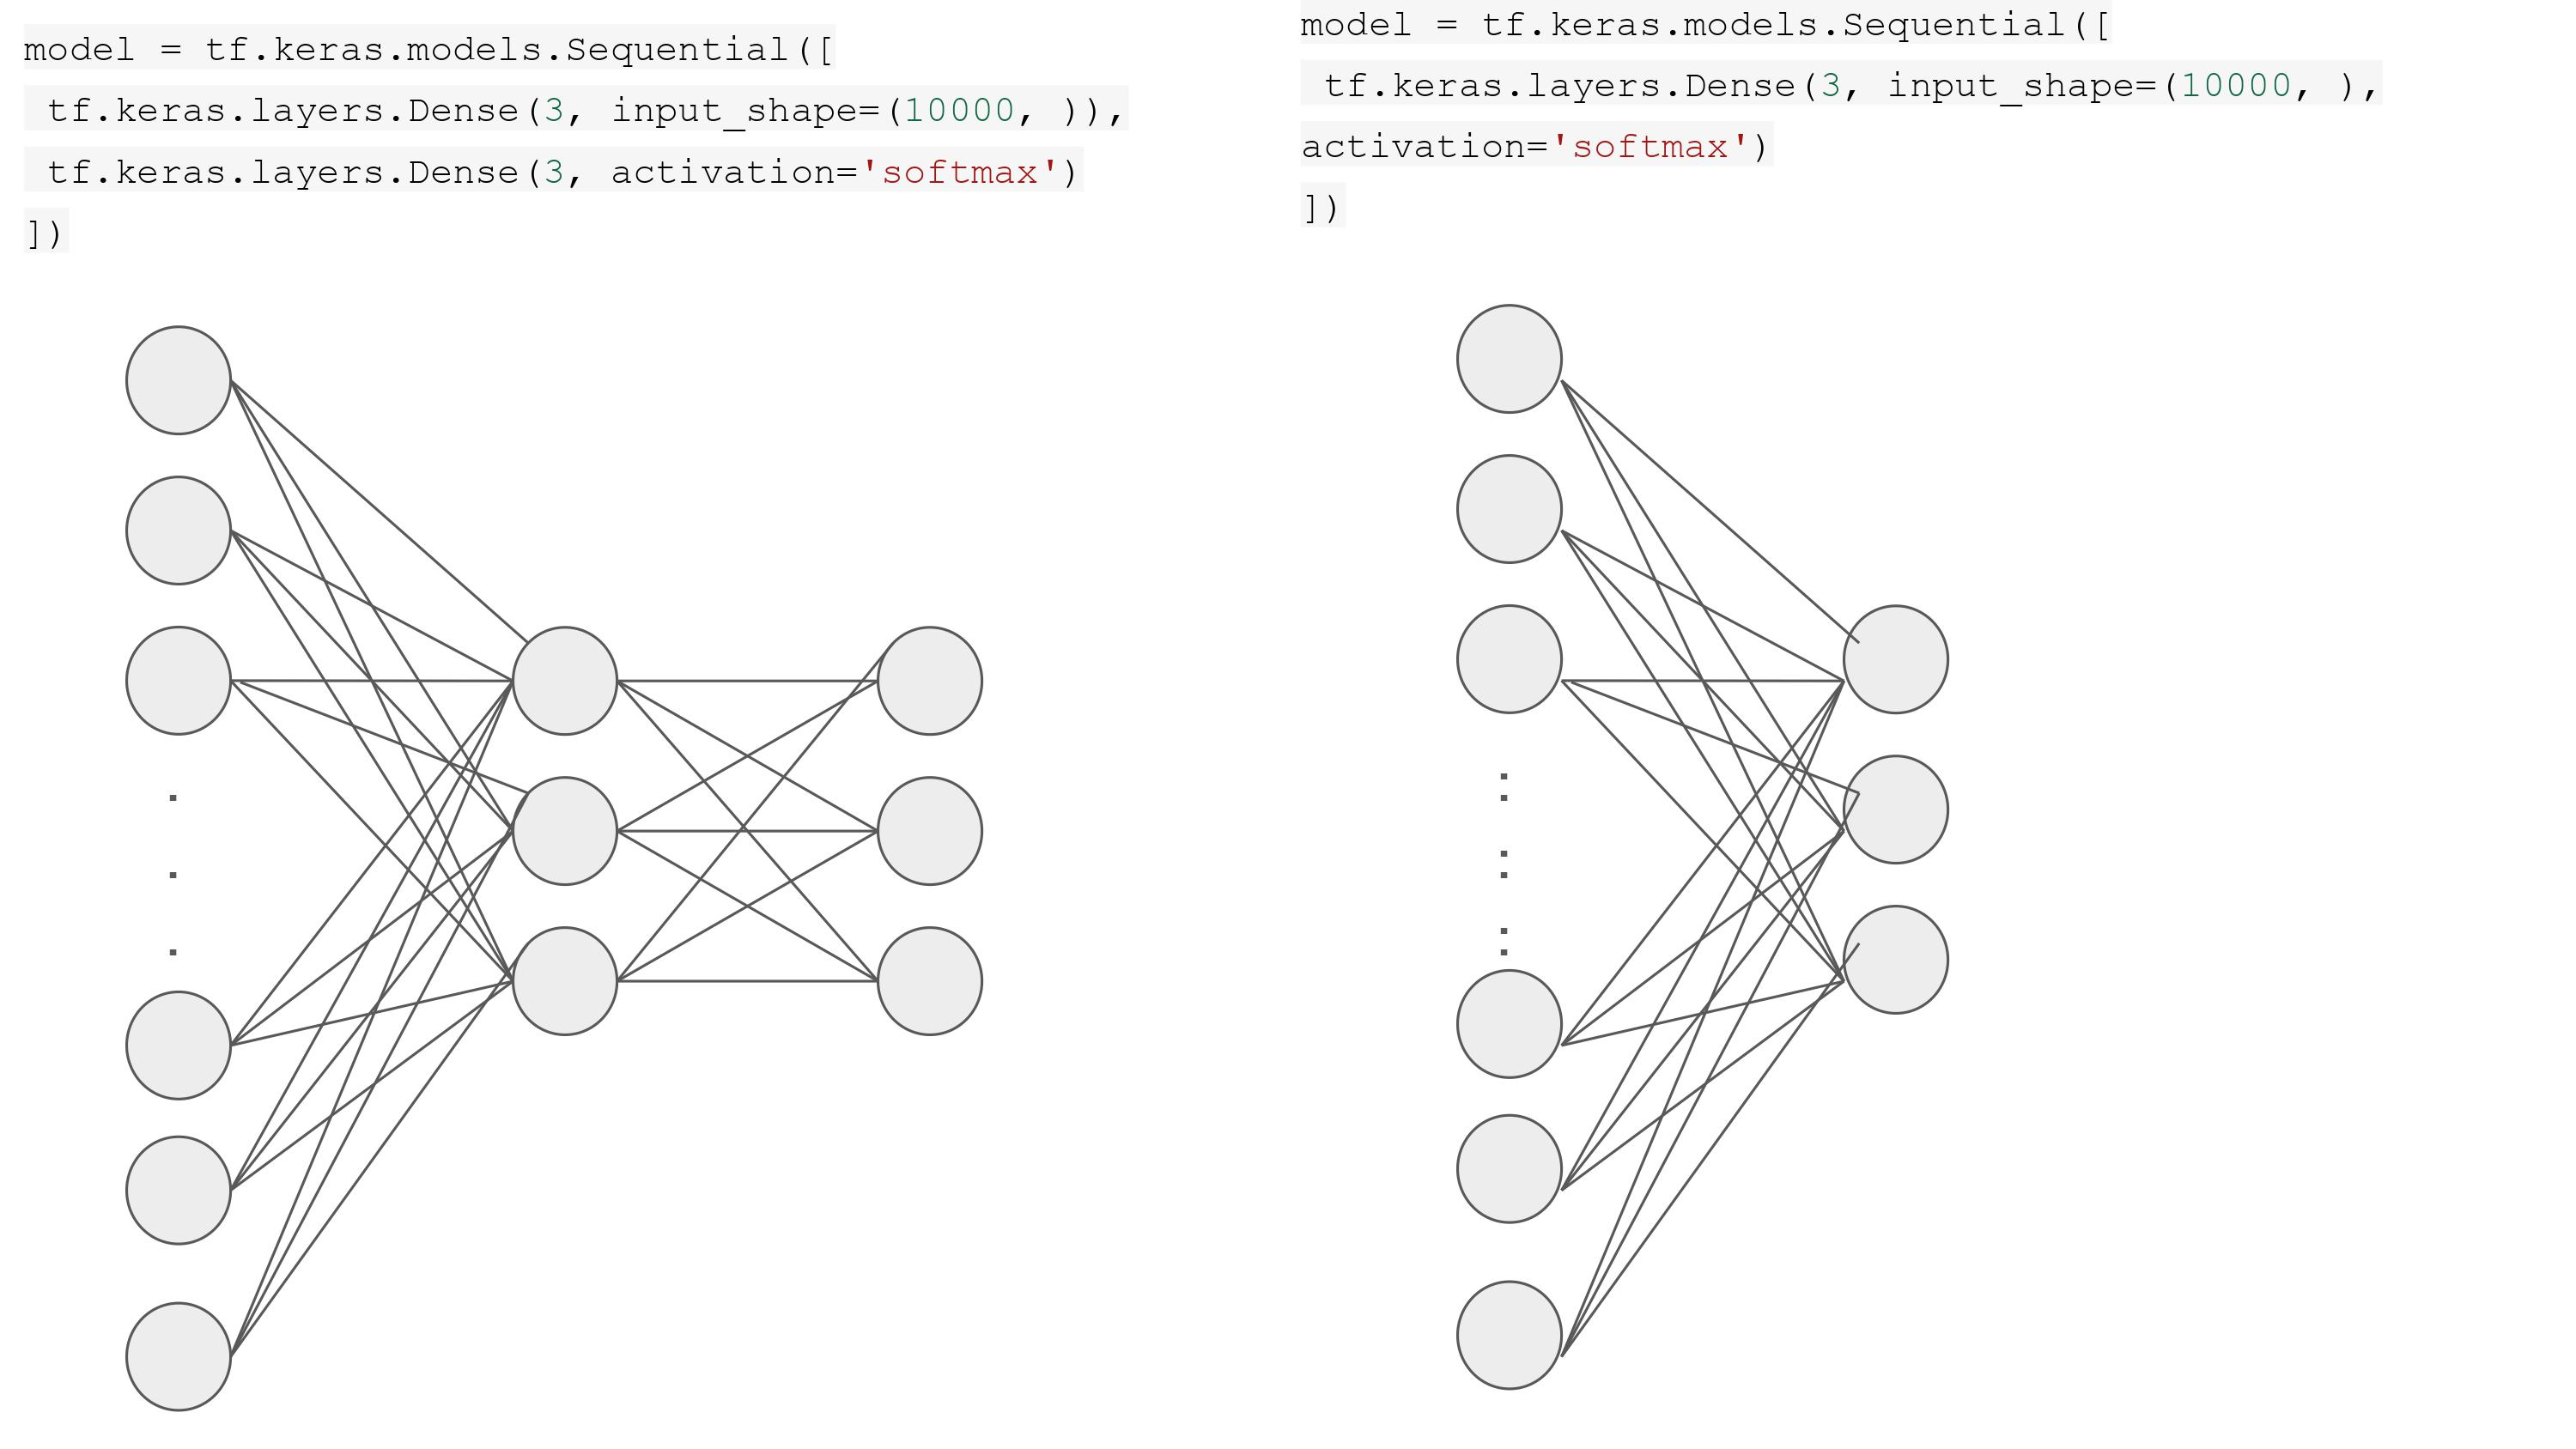

## Preprocessing the dataset for regression
1. Standardization : Change data into the distribution with mean 0 and std1

$$x_{new} = \frac{x-mean(X)}{SD(x)}$$

2. Min-Max normalization : change date with max 1 and min 0

$$x_{new} = \frac{x-min(X)}{max(X)-min(X)}$$


2025.1.15
1. Try with three node

2. Try Eq.(11)

In [1]:
import zipfile
import tensorflow as tf
import os
# import  imageio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from keras.utils import to_categorical #For keras > 2.0
# import cv2
import scipy.io
from sklearn.model_selection import train_test_split
from keras import initializers
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestRegressor
from pyESN.pyESN import ESN

In [2]:
# mat = scipy.io.loadmat('case3_quantum.mat')
mat = scipy.io.loadmat('case3_5000.mat')
mat2 = scipy.io.loadmat('g2_a.mat')
mat3 = scipy.io.loadmat('case3_extended_8000.mat')



ns = mat['ns']
n_classic = mat2['n_a']
g2 = mat['g2_a']
g2_classic = mat['g2_a']
Delta = mat['Delta1_vector']


ns3_extended = mat3['ns']
nn_classic = mat3['n_a']
# ns3_extended = ns3_extended[1000:3000]
g2_case3_extended = abs(mat3['g2_a'])
# g2_case3_extended = g2_case3_extended[1000:3000]
Delta_extended = mat3['Delta1_vector'][0]
# Delta_extended = Delta_extended[1000:3000]

In [5]:

# ax1.set_yticks(fontsize=25)
# ax1.set_xticks([-10],fontsize=25)


# plt.plot(Delta_extended, nn_classic, color='tomato')
# plt.xlabel("$\Delta_{b}$",fontsize=20)
# plt.ylabel('$<a^{\dagger}a>$',fontsize=20, color='tomato')
# plt.xticks([-10,-5,0,5,10],fontsize=20)
# plt.yticks([0.1,0.3,0.5,0.7],fontsize=20)
# # plt.yticks([1.0,2,3,4,5],fontsize=20)

In [7]:
# np.shape(n_squ)
n_case3_extended_Delta = []
g2_re_extended = []
n_classic = []
# g2_squ_1000 = []
# for i in range(1000,3000,1):
for i in range(8000):
    n_case3_extended_Delta.append(ns3_extended[0][i][0])
    g2_re_extended.append({g2_case3_extended[i][0]:Delta_extended[i]})
    n_classic.append(nn_classic[i][0])

X_train_c3_ex, X_test_c3_ex, Y_train_c3_ex, Y_test_c3_ex = train_test_split(n_case3_extended_Delta,g2_re_extended, test_size=0.05)
X_train_c, X_test_c, Y_train_c, Y_test_c = train_test_split(n_classic, g2_re_extended, test_size=0.05)
X_train_c = np.reshape(X_train_c,[len(X_train_c),1])
X_test_c = np.reshape(X_test_c,[len(X_test_c),1])

In [9]:
len(Y_test_c3_ex)

400

In [11]:
Y_train_g2 = []
Y_train_r = []

Y_test_g2 = []
Y_test_r = []


for ele in Y_train_c3_ex:
  key = list(ele.keys())
  value = list(ele.values())
  Y_train_g2.append(key)
  Y_train_r.append(value[0])
Y_train_g2 = np.reshape(Y_train_g2,(len(Y_train_g2),1))

for ele in Y_test_c3_ex:
  key = list(ele.keys())
  value = list(ele.values())
  Y_test_g2.append(key[0])
  Y_test_r.append(value[0])
Y_test_g2 = np.reshape(Y_test_g2,(len(Y_test_g2),1))


Y_train_g2_c = []
Y_train_r_c = []

Y_test_g2_c = []
Y_test_r_c = []

for ele in Y_train_c:
  key = list(ele.keys())
  value = list(ele.values())
  Y_train_g2_c.append(key)
  Y_train_r_c.append(value[0])
Y_train_g2_c = np.reshape(Y_train_g2_c,(len(Y_train_g2_c),1))

for ele in Y_test_c:
  key = list(ele.keys())
  value = list(ele.values())
  Y_test_g2_c.append(key[0])
  Y_test_r_c.append(value[0])
Y_test_g2_c = np.reshape(Y_test_g2_c,(len(Y_test_g2_c),1))

In [13]:
np.shape(X_train_c)

(7600, 1)

In [15]:
np.shape(Y_train_g2_c)

(7600, 1)

In [17]:
regressor = RandomForestRegressor(n_estimators=100)
regressor.fit(X_train_c3_ex, Y_train_g2)
Y_predict_RFR = regressor.predict(X_test_c3_ex)
# s1=regressor.score(X_train_c3_ex, Y_train_g2)
# s2=regressor.score(X_test_c3_ex, Y_test_g2)
# print([s1,s2])

# X_train_c, X_test_c, Y_train_c, Y_test_c 
regressor_classic = RandomForestRegressor(n_estimators=100)
regressor_classic.fit(X_train_c, Y_train_g2_c)
Y_predict_RFR_classic = regressor_classic.predict(X_test_c)
# s1_c=regressor_classic.score(X_train_c, Y_train_g2_c)
# s2_c=regressor_classic.score(X_test_c, Y_test_g2_c)
# print([s1_c,s2_c])

C:\Users\kodo0\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[0.9912770842779012, 0.938402355861869]


C:\Users\kodo0\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[0.7250726156630714, -0.9993443744364103]


In [18]:
print([mean_squared_error(Y_test_g2, Y_predict_RFR),mean_squared_error(Y_test_g2_c, Y_predict_RFR_classic)])

[0.037523256018920266, 1.1724485677630465]


<>:9: SyntaxWarning: invalid escape sequence '\D'
<>:11: SyntaxWarning: invalid escape sequence '\d'
<>:9: SyntaxWarning: invalid escape sequence '\D'
<>:11: SyntaxWarning: invalid escape sequence '\d'
C:\Users\kodo0\AppData\Local\Temp\ipykernel_30264\957834439.py:9: SyntaxWarning: invalid escape sequence '\D'
  ax1.set_xlabel('$\Delta_{b}$',fontsize=25)
C:\Users\kodo0\AppData\Local\Temp\ipykernel_30264\957834439.py:11: SyntaxWarning: invalid escape sequence '\d'
  ax2.set_ylabel('$<a^{\dagger}a>$',fontsize=25, color='tomato')


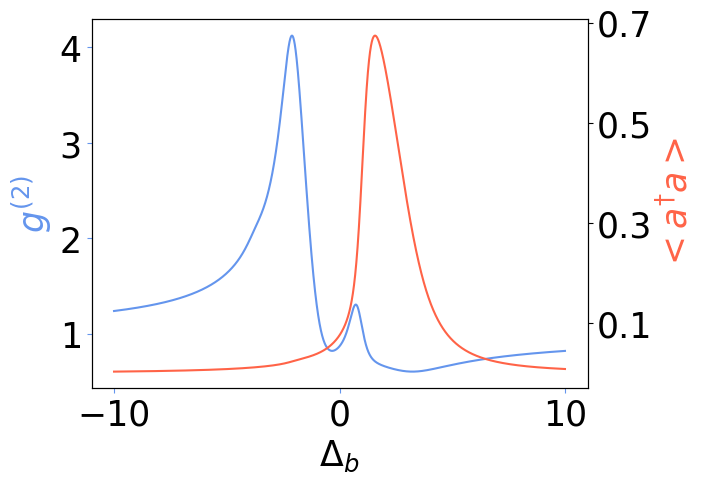

In [19]:
# fig, axs = plt.subplots(2)
# fig.suptitle('Vertically stacked subplots')
# axs[0].plot(x, y)
# axs[1].plot(x, -y)
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(Delta_extended, g2_case3_extended, color='cornflowerblue')
ax2.plot(Delta_extended, nn_classic, color='tomato')
ax1.set_xlabel('$\Delta_{b}$',fontsize=25)
ax1.set_ylabel('$g^{(2)}$',fontsize=25, color='cornflowerblue')
ax2.set_ylabel('$<a^{\dagger}a>$',fontsize=25, color='tomato')
ax1.set_yticks([1,2,3,4])
ax2.set_yticks([0.1,0.3,0.5,0.7])
ax1.tick_params(axis='both', which='major', labelsize=25, color='cornflowerblue')
ax2.tick_params(axis='both', which='major', labelsize=25)

<>:9: SyntaxWarning: invalid escape sequence '\D'
<>:15: SyntaxWarning: invalid escape sequence '\d'
<>:20: SyntaxWarning: invalid escape sequence '\D'
<>:9: SyntaxWarning: invalid escape sequence '\D'
<>:15: SyntaxWarning: invalid escape sequence '\d'
<>:20: SyntaxWarning: invalid escape sequence '\D'
C:\Users\kodo0\AppData\Local\Temp\ipykernel_30264\2640235965.py:9: SyntaxWarning: invalid escape sequence '\D'
  axs[0].set_xlabel('$\Delta_{b}$',fontsize=font_size)
C:\Users\kodo0\AppData\Local\Temp\ipykernel_30264\2640235965.py:15: SyntaxWarning: invalid escape sequence '\d'
  t.set_ylabel('$<a^{\dagger}a>$',fontsize=font_size, color='tomato')
C:\Users\kodo0\AppData\Local\Temp\ipykernel_30264\2640235965.py:20: SyntaxWarning: invalid escape sequence '\D'
  axs[1].set_xlabel('$\Delta_{b}$',fontsize=font_size)


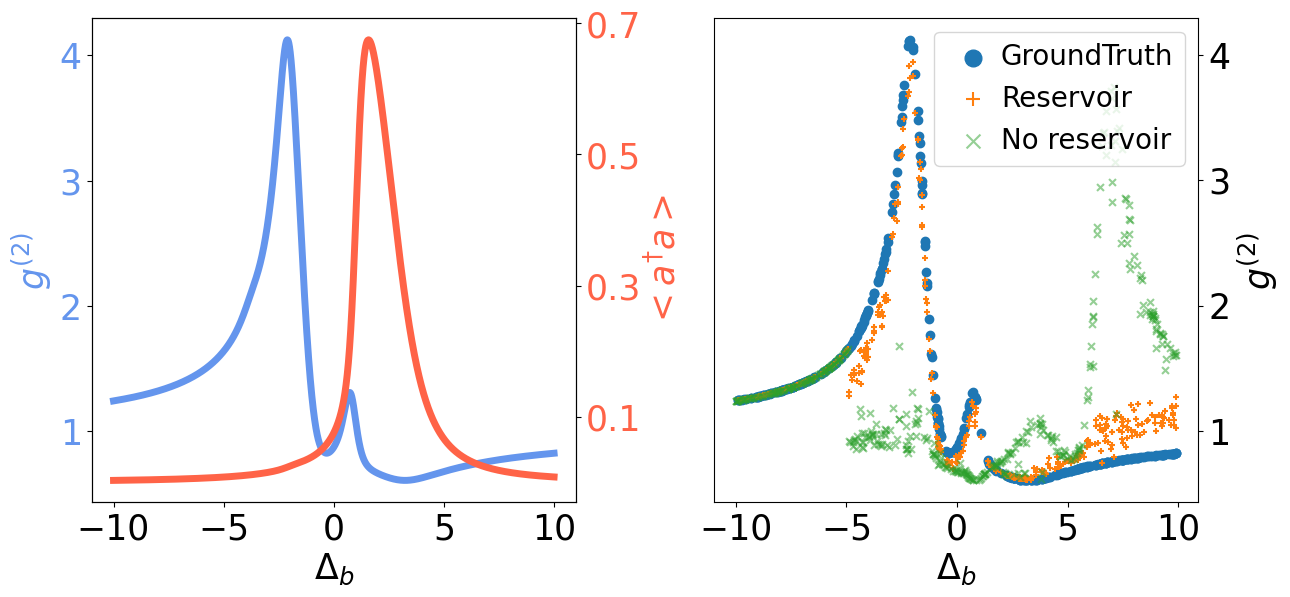

In [33]:
fig, axs = plt.subplots(1,2, figsize=(13, 13))

font_size = 25
axs[0].tick_params(axis ='y', labelcolor = 'cornflowerblue',labelsize=25)
axs[0].tick_params(axis ='x',labelsize=font_size)
axs[0].plot(Delta_extended, g2_case3_extended, color='cornflowerblue',linewidth=5)
axs[0].set_yticks([1,2,3,4])
axs[0].set_xticks([-10,-5,0,5,10])
axs[0].set_xlabel('$\Delta_{b}$',fontsize=font_size)
axs[0].set_ylabel('$g^{(2)}$',fontsize=font_size, color='cornflowerblue')
t = axs[0].twinx()
t.tick_params(axis ='y', labelcolor = 'tomato',labelsize=font_size)
t.plot(Delta_extended, nn_classic, color='tomato',linewidth=5)
t.set_yticks([0.1,0.3,0.5,0.7])
t.set_ylabel('$<a^{\dagger}a>$',fontsize=font_size, color='tomato')
axs[0].set_box_aspect(1)


axs[1].set_ylabel('$g^{(2)}$',fontsize=font_size)
axs[1].set_xlabel('$\Delta_{b}$',fontsize=font_size)
axs[1].scatter(Y_test_r, Y_test_g2,label = 'GroundTruth')
axs[1].scatter(Y_test_r, Y_predict_RFR,marker="+",s=25,label = 'Reservoir')
axs[1].scatter(Y_test_r_c, Y_predict_RFR_classic,marker="x",s=25,label = 'No reservoir', alpha=0.5)
axs[1].tick_params(labelsize=font_size)
axs[1].set_xticks([-10,-5,0,5,10])
axs[1].set_box_aspect(1)
axs[1].yaxis.set_label_position("right")
axs[1].yaxis.tick_right()
axs[1].legend(fontsize=20,markerscale=2,handletextpad=0.001, loc=1)
# axs[1].tick_params(axis ='y', labelcolor = 'g')
# axs[1].twinx().tick_params(axis ='y', labelcolor = 'b')


# axs[1,0].tick_params(axis ='y', labelcolor = 'g')
# axs[1,0].twinx().tick_params(axis ='y', labelcolor = 'b')

# axs[1,1].tick_params(axis ='y', labelcolor = 'g')
# axs[1,1].twinx().tick_params(axis ='y', labelcolor = 'b')


# fig.supylabel('Green label', color='g')
plt.tight_layout()

<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:4: SyntaxWarning: invalid escape sequence '\D'
C:\Users\kodo0\AppData\Local\Temp\ipykernel_20088\1810254024.py:4: SyntaxWarning: invalid escape sequence '\D'
  plt.xlabel('$\Delta_{b}$',fontsize=20)


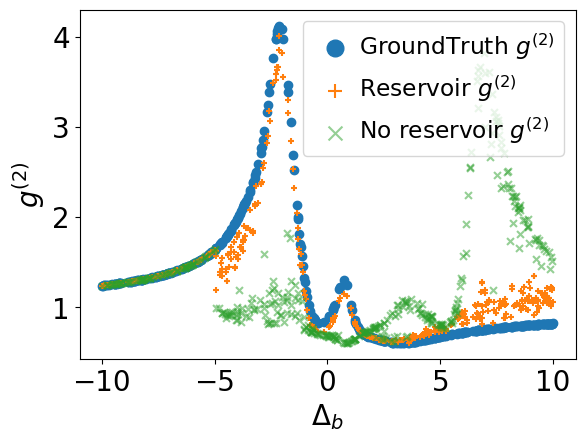

In [139]:
plt.scatter(Y_test_r, Y_test_g2,label = 'GroundTruth $g^{(2)}$')
plt.scatter(Y_test_r, Y_predict_RFR,marker="+",s=25,label = 'Reservoir $g^{(2)}$')
plt.scatter(Y_test_r_c, Y_predict_RFR_classic,marker="x",s=25,label = 'No reservoir $g^{(2)}$', alpha=0.5)
plt.xlabel('$\Delta_{b}$',fontsize=20)
plt.ylabel('$g^{(2)}$',fontsize=20)
plt.xticks([-10,-5,0,5,10],fontsize=20)
plt.yticks([1,2,3,4],fontsize=20)
plt.legend(fontsize=16.8,markerscale=2,handletextpad=0.001, loc=1)
ax = plt.gca() #you first need to get the axis handle
ax.set_aspect(4) #sets the height to weight ratio to 2
# plt.plot(x,y)